# **Deep Neural Network (DNN)**

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning.

Deep learning uses artificial neural networks to perform sophisticated computations on large amounts of data. It is a type of machine learning that works based on the structure and function of the human brain. 

deep learning currently provide the best solutions to many problems in image recognition, computer vision, speech recognition, natural language processing, etc. 

Deep learning has gained massive popularity in scientific computing, and its algorithms are widely used by industries that solve complex problems. All deep learning algorithms use different types of neural networks to perform specific tasks.

## Types of Algorithms used in Deep Learning

Here is the list of the top most popular deep learning algorithms:

1. Multilayer Perceptrons (MLPs)
2. Convolutional Neural Networks (CNNs)
3. Long Short Term Memory Networks (LSTMs)
4. Recurrent Neural Networks (RNNs)
5. Generative Adversarial Networks (GANs)
6. Autoencoders, etc

## Multilayer Perceptrons (MLPs)

MLPs belong to the class of feedforward neural networks with multiple layers of perceptrons that have activation functions. MLPs consist of an input layer and an output layer that are fully connected. They have the same number of input and output layers but may have multiple hidden layers and can be used to build speech-recognition, image-recognition, and machine-translation software.

### How Do MLPs Work?
- MLPs feed the data to the input layer of the network. The layers of neurons connect in a graph so that the signal passes in one direction.
- MLPs compute the input with the weights that exist between the input layer and the hidden layers.
- MLPs use activation functions to determine which nodes to fire. Activation functions include ReLUs, sigmoid functions, and tanh.
- MLPs train the model to understand the correlation and learn the dependencies between the independent and the target variables from a training data set.

Below is an example of an MLP. The diagram computes weights and bias and applies suitable activation functions to classify images of cats and dogs.

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Multilayer_Perceptron.PNG)

## Convolutional Neural Networks (CNNs)

Traditional convolutional neural networks are frequently used in computer vision problems, where a computer must work with an image, and extract features and patterns. Convolutional neural networks are also used in video processing.



Over the years, there are many variants of CNN architectures have been developed to solve real-world problems. LeNet is the first successful application of CNNs and was developed by Yann Lecun in the 1990s that was used to read zip codes, digits, etc. The latest work is called LeNet-5 which a 5-layer CNN that reaches 99.2 % accuracy on insolated character recognition.
![](https://miro.medium.com/max/875/1*QFfq4_TBthj3Bmq49BF7tQ.png)

one of the most important operations in the CNN network: **convolution**. The first layer of a Convolutional Neural Network is always a **Convolutional Layer**. Convolutional layers apply a convolution operation to the input, passing the result to the next layer.

## How does a Convolution layer work?

### Convolutional Layer
We use multiple convolution filters or kernels that run over the image and compute a dot product. Each filter extracts different features from the image.

Lets consider a filter of size 3x3 and an image of size 5x5. We perform an element wise multiplication between the image pixel values that match the size of the kernel and the the kernel itself and sum them up. This provides us a single value for the feature cell.

![alt](https://miro.medium.com/max/583/1*xBkRA7cVyXGHIrtngV3qlg.png) 
![alt](https://miro.medium.com/max/583/1*7CI6Ji1m7u9WbJcZRfECDA.png)
![alt](https://miro.medium.com/max/583/1*67dy99cO6tbl9NoPB2riEA.png)

In the above example we are sliding the kernel by 1 pixel. This is called **stride**. We can have the kernel move by different stride values to extract different kinds of features.

**Padding**

Padding is a technique to simply add zeros around the margin of the image to increase it’s dimension. Padding allows us to emphasize the border pixels and in order lose less information.
Here is an example with an input image of size 5x5 which is padded to 7x7 i.e. padding size of 1 and convoluted by a kernel of size 3x3 with stride of 1 resulting in a feature of size 5x5.

![](https://miro.medium.com/max/583/1*GE2sny83f_u_o0jf6_wNRQ.png)

### Pooling Layer
Max pooling layer helps reduce the spatial size of the convolved features and also it is a sample-based discretization process.
It is similar to the convolution layer but instead of taking a dot product between the input and the kernel, we take the specific value of the region from the input overlapped by the kernel.

- MaxPooling
- AveragePooling
- GlobalMaxPooling
- GlobalAveragePooling

more detail you can check this ["link"](https://keras.io/api/layers/pooling_layers/)

Below is an example which shows a **maxpool layer’s** operation with a kernel having size of 2 and stride of 1.

![](https://miro.medium.com/max/583/1*VrBFhQqylF-xK5BPkFgd5g.png)
![](https://miro.medium.com/max/583/1*Z6lTnBzmMRugKtY7Wm7MeA.png)

**Commonly used activation functions**

- Rectified Linear Unit - The rectified linear unit layer (ReLU)
- Softmax - The softmax step can be seen as a generalized logistic function (sigmoid function)

To learn more about Deep learning, kindly go to these links: ["Afshine Amidi"](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) and ["Additional Papers"](https://github.com/rauzansumara/introduction-to-machine-learning/tree/main/Material)

## Using CNN Model

In this tutorial, we’ll discuss our  face mask classification, detailing how our computer vision/deep learning will be implemented.

I’ll then show you how to implement a Python script to train a face mask classification on our dataset using TensorFlow.

In [3]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

### Datasets

<p float="left">
  <img src="datasets/with_mask/0-with-mask.jpg" width="500" />
  <img src="datasets/without_mask/augmented_image_1.jpg" width="330" /> 
</p>

### 1. Import Data

In [26]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("datasets"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image, mode='tf') # -1 to 1
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In this block, we are:

- Grabbing all of the **imagePaths** in the dataset
- Initializing **data** and **labels** lists
- Looping over the **imagePaths** and loading + pre-processing images. Pre-processing steps include resizing to **224×224 pixels**, conversion to array format, and scaling the pixel intensities in the input image to the range [-1, 1] (via the **preprocess_input** convenience function)
- Appending the pre-processed image and associated label to the data and labels lists, respectively
- Ensuring our training data is in NumPy array format. The above lines of code assume that your entire dataset is small enough to fit into memory.

Our data preparation work isn’t done yet. Next, we’ll encode our labels, partition our dataset, and prepare for data augmentation:

### 2. Pre-processing & Data Augmentation

In [27]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


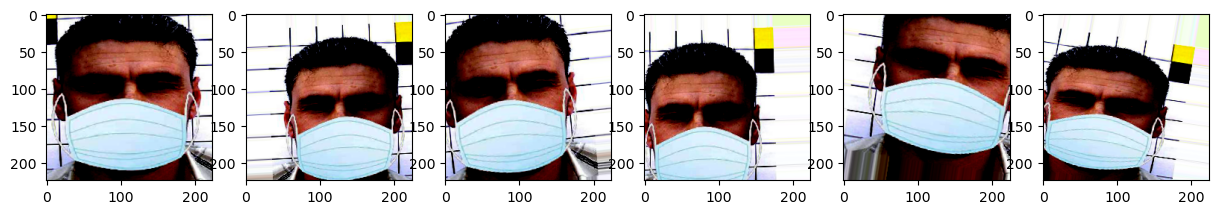

In [40]:
# generate samples and plot
aug_iter = aug.flow(np.expand_dims(trainX[1], axis=0))
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))

# generate batch of images
for i in range(6):
	# convert to unsigned integers
	image = next(aug_iter)[0]
	# plot image
	ax[i].imshow(image)

### 3. Data Summary

In [41]:
# summarize loaded dataset
print('Train set: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test set: X=%s, y=%s' % (testX.shape, testY.shape))

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Output classes : ', classes)
print('Total number of outputs : ', nClasses)

Train set: X=(1100, 224, 224, 3), y=(1100, 2)
Test set: X=(276, 224, 224, 3), y=(276, 2)
Output classes :  [0. 1.]
Total number of outputs :  2


### 7. Define Model

In [44]:
# Define the Model
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='sigmoid'))   
    return model

model = createModel()

### 8. Fit Model

In [49]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 5
BS = 32

# compile our model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, 
	metrics=["accuracy"])
	
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/5
34/34 [==============================] - 70s 2s/step - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.0801 - val_accuracy: 0.9891
Epoch 2/5
34/34 [==============================] - 69s 2s/step - loss: 0.0594 - accuracy: 0.9785 - val_loss: 0.1066 - val_accuracy: 0.9891
Epoch 3/5
34/34 [==============================] - 71s 2s/step - loss: 0.0502 - accuracy: 0.9897 - val_loss: 0.0743 - val_accuracy: 0.9855
Epoch 4/5
34/34 [==============================] - 69s 2s/step - loss: 0.0481 - accuracy: 0.9890 - val_loss: 0.1181 - val_accuracy: 0.9493
Epoch 5/5
34/34 [==============================] - 70s 2s/step - loss: 0.0448 - accuracy: 0.9888 - val_loss: 0.0742 - val_accuracy: 0.9855


**compile** our model with the Adam optimizer, a learning rate decay schedule, and **binary cross-entropy**. If you’re building from this training script with > 2 classes, be sure to use **categorical cross-entropy**.

Face mask training is launched. Notice how our data **augmentation object (aug)** will be providing batches of mutated image data.

Once training is complete, we’ll evaluate the resulting model on the test set:

### 10. Evaluate Model

In [51]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detection_model.h5")

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       138
without_mask       0.99      0.99      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276

[INFO] saving mask detector model...


Here, we make predictions on the test set, grabbing the highest probability class label indices. Then, we print a classification report in the terminal for inspection. we also serializes our face mask classification model to disk.

Our last step is to plot our accuracy and loss curves:

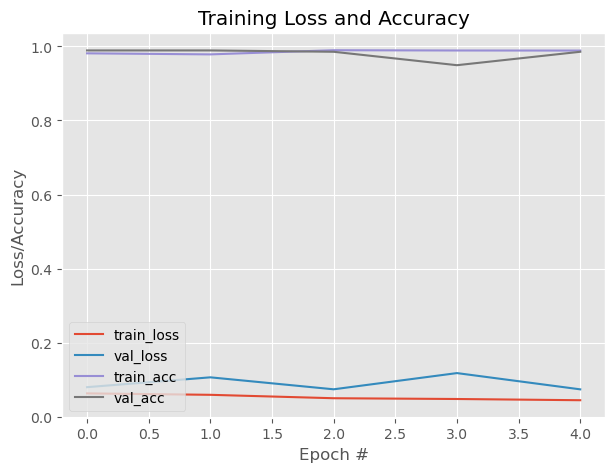

In [55]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(7,5))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### 11. Implementing our face mask model in real-time video streams

In [57]:
# import the necessary packages
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from imutils.video import VideoStream, WebcamVideoStream
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import time
import cv2
import os

The algorithm for this script is the same, but it is pieced together in such a way to allow for processing every frame of your webcam stream.

Thus, the only difference when it comes to imports is that we need a **VideoStream** class and **time**. Both of these will help us to work with the stream. We’ll also take advantage of **imutils** for its aspect-aware resizing method.

In [59]:
# call our face detection model
print("[INFO] loading face detector model...")
cascPath = os.path.dirname(cv2.__file__)+"/data/haarcascade_frontalface_default.xml"
faceNet = cv2.CascadeClassifier(cascPath)

# load the face mask detection model from disk
print("[INFO] loading face mask detector model...")
maskNet = load_model("mask_detection_model.h5")

[INFO] loading face detector model...
[INFO] loading face mask detector model...


Our **detect_and_predict_mask** function accepts three parameters:

- **image**: A frame/image from our stream
- **faceNet**: The model used to detect where in the image faces are
- **maskNet**: Our COVID-19 face mask classifier model

In [62]:
def detect_and_predict_mask(image, faceNet, maskNet):
	# grab the dimensions of the frame and obtain the face detections
	frame = faceNet.detectMultiScale(image, scaleFactor=1.2,
        	minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []
    # loop over the detections
	for box in frame:
		# compute the (x, y)-coordinates of the bounding box for
		# the object
		startX, startY, width, height = box
		endX, endY = startX + width, startY + height
		# extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face, mode='tf')
		# add the face and bounding boxes to their respective
		# lists
		faces.append(face)
		locs.append((startX, startY, endX, endY))
	
    # only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)
	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

Here we have initialize Webcam video stream. Let’s proceed to loop over frames in the stream:

In [65]:
# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = VideoStream(0).start()

[INFO] starting video stream...


In [64]:
# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=600)
	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)
	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred
		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()